In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/day.csv')

# This gives us a quick idea of the structure and content of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
# We're confirming the number of rows (should be 731) and that all features have expected types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [15]:
# This helps us understand the range and distribution of numeric variables
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


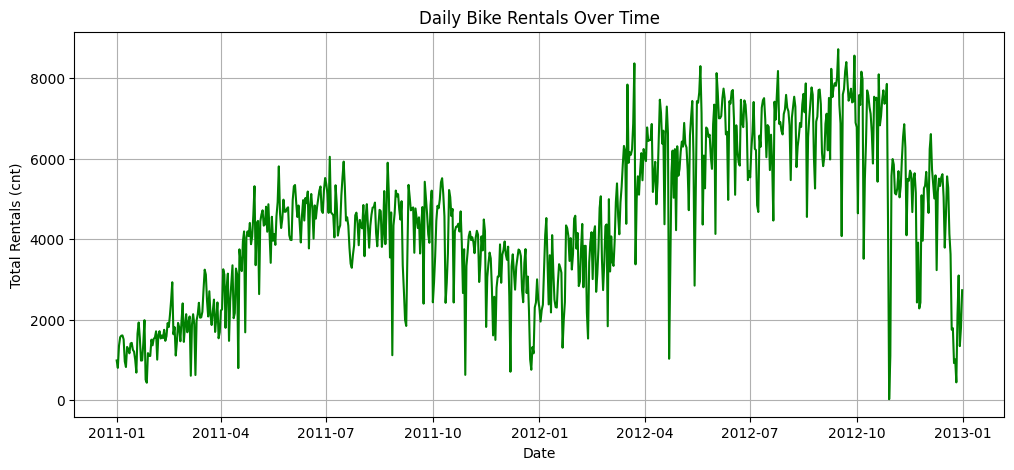

In [16]:
# Draw a time series plot for bike rental over time
plt.figure(figsize=(12, 5))
plt.plot(pd.to_datetime(df['dteday']), df['cnt'], color='green')
plt.title('Daily Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rentals (cnt)')
plt.grid(True)
plt.show()

This time series plot clearly shows both seasonality and growth. In both 2011 and 2012, rentals peak during warmer months (typically summer and early fall) and drop sharply in winter. There's also an upward trend from 2011 to 2012, suggesting that the system gained popularity over time. The sharp drop may indicate holidays, severe weather, or data anomalies. Overall, the pattern highlights that time and season are strong drivers of bike demand.

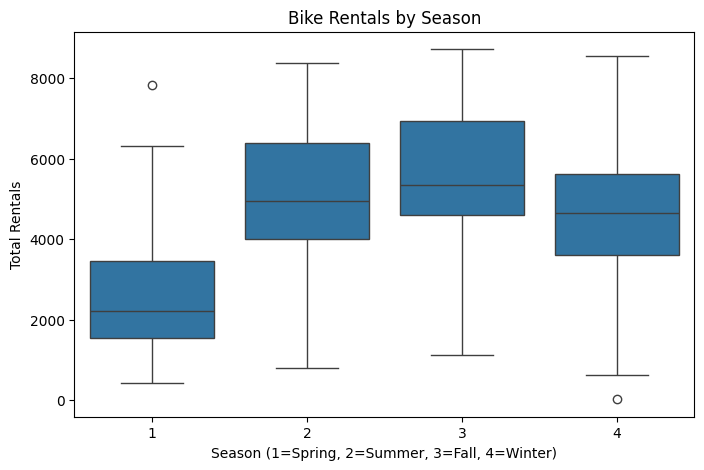

In [17]:
# Draw a boxplot for bike rental by season
plt.figure(figsize=(8, 5))
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Bike Rentals by Season')
plt.xlabel('Season (1=Spring, 2=Summer, 3=Fall, 4=Winter)')
plt.ylabel('Total Rentals')
plt.show()

As expected, bike rentals peak in summer (2) and fall (3), when the weather is most favorable. Spring (1) has the lowest median and widest spread, suggesting inconsistent usage number due to unpredictable weather. Winter (4) still shows decent usage, which potentially driven by commuters, but with more frequent low-rental days. Overall, season has a clear impact on demand, making it a strong candidate for our predictive models.

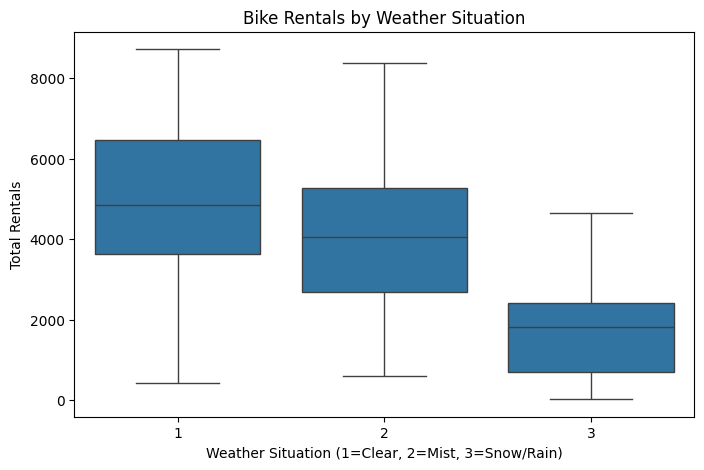

In [18]:
# Similar plot as previous, but emphasize on weather
plt.figure(figsize=(8, 5))
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation (1=Clear, 2=Mist, 3=Snow/Rain)')
plt.ylabel('Total Rentals')
plt.show()

Weather has a strong impact on rentals. In Clear days (1) we can see the highest median usage and widest spread—people ride more often. On misty days (2), rentals drop but still remain active. Snowy or rainy days (3) lead to a steep decline in demand, with most values clustering in the lower range. This reinforces that incorporating weather data will be essential in building a reliable prediction model.

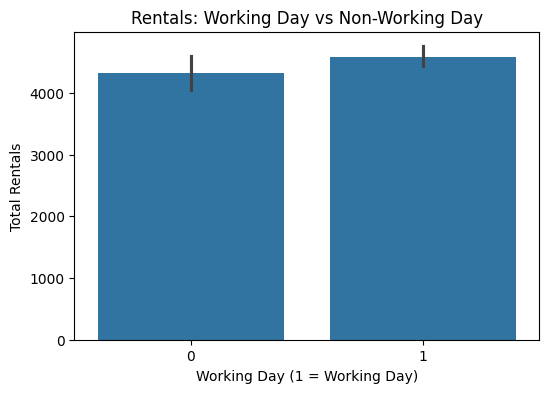

In [19]:
# Draw a bargraph showing (non)working day's rental differences
plt.figure(figsize=(6, 4))
sns.barplot(x='workingday', y='cnt', data=df)
plt.title('Rentals: Working Day vs Non-Working Day')
plt.xlabel('Working Day (1 = Working Day)')
plt.ylabel('Total Rentals')
plt.show()

Surprisingly, there's only a small difference between working and non-working days. This suggests that both commuters and recreational users contribute meaningfully to demand. It's possible that weekday usage comes from office workers, while weekends are driven by casual users and leisure rides, balancing the overall volume.

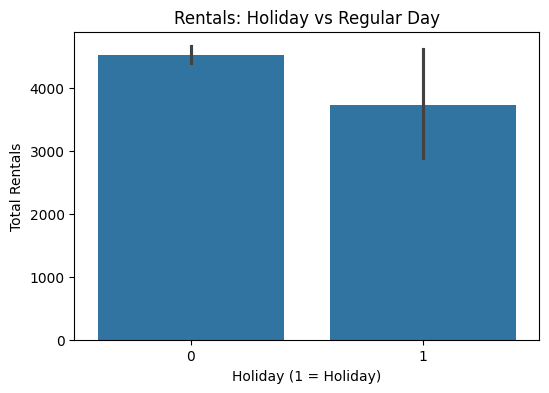

In [20]:
# Bar graph showing the difference of bike rental number between holiday and regular day
plt.figure(figsize=(6, 4))
sns.barplot(x='holiday', y='cnt', data=df)
plt.title('Rentals: Holiday vs Regular Day')
plt.xlabel('Holiday (1 = Holiday)')
plt.ylabel('Total Rentals')
plt.show()

Bike rentals tend to drop on holidays compared to regular days. This might seem counterintuitive at first, but it likely reflects a drop in commuter traffic, which normally drives up weekday usage. The wider error bar on holidays also suggests greater variability, possibly depending on weather or the type of holiday.

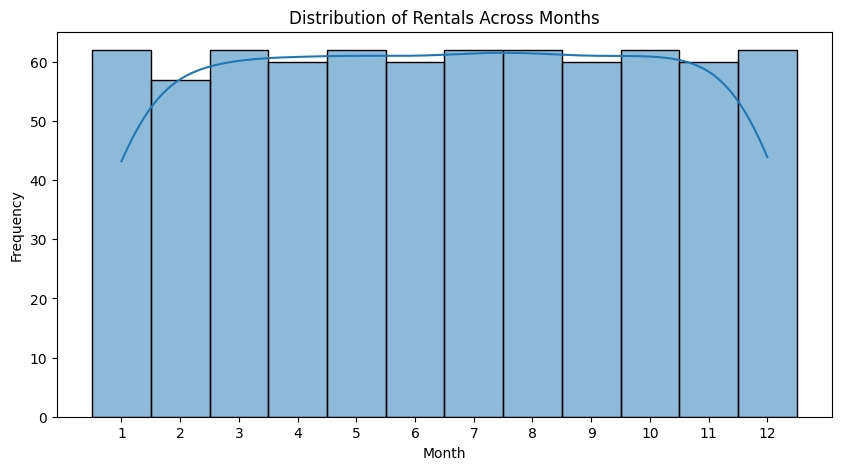

In [21]:
# Draw a histogram showing the distribution of rental over the year
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='mnth', bins=12, kde=True, discrete=True)
plt.title('Distribution of Rentals Across Months')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(1,13))
plt.show()

This histogram shows that bike rentals are relatively evenly distributed across months, with only subtle seasonal variation. Since each month contributes a similar number of days, this plot confirms that we have a balanced dataset across time, which is important for avoiding seasonal bias during modeling.

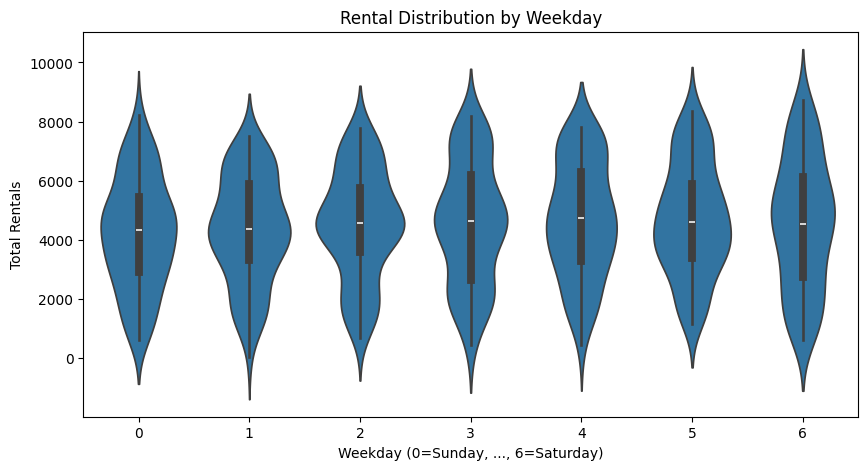

In [22]:
# Draw a violin graph for rental by weekday
plt.figure(figsize=(10, 5))
sns.violinplot(x='weekday', y='cnt', data=df)
plt.title('Rental Distribution by Weekday')
plt.xlabel('Weekday (0=Sunday, ..., 6=Saturday)')
plt.ylabel('Total Rentals')
plt.show()

The distribution of rentals is remarkably consistent across weekdays. There's no dramatic difference between weekdays and weekends. The violin plots also show long tails on both ends, meaning there are occasional low and high usage days across the week. This reinforces that day of the week alone doesn't strongly determine demand, but might still add value when combined with weather or seasonality.

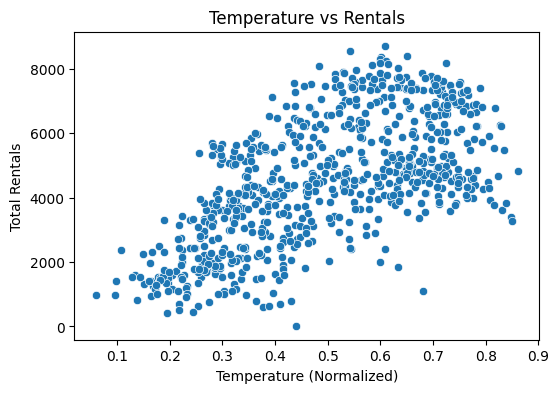

In [23]:
# Draw a scatter plot for temperature and rental number
plt.figure(figsize=(6, 4))
sns.scatterplot(x='temp', y='cnt', data=df)
plt.title('Temperature vs Rentals')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Total Rentals')
plt.show()

There's a clear positive relationship between temperature and rental volume. As it gets warmer, people will ride more. After around 0.7, the trend gradually stop increasing and starts to drop, showing that very hot days discourage some users.

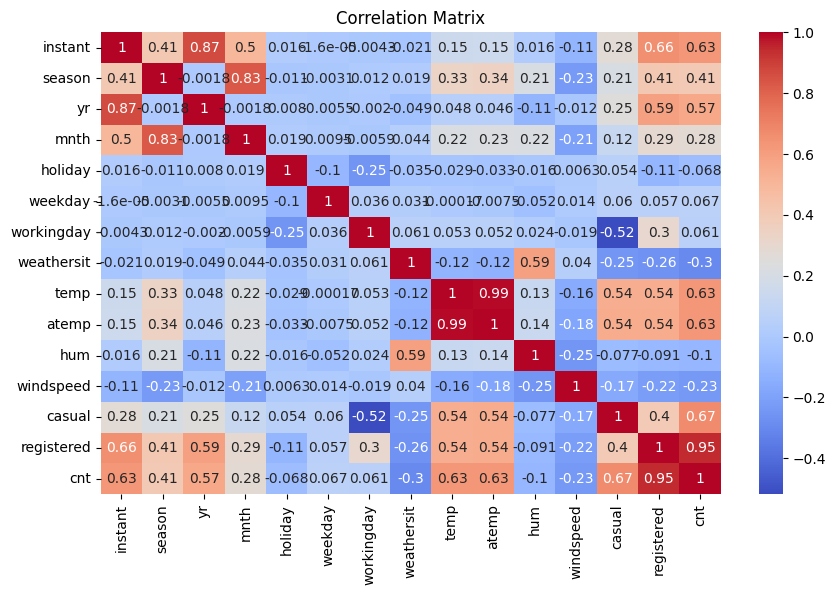

In [24]:
# Pose a correlation matrix
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

As expected, cnt has a strong positive correlation with registered and casual. Among predictors, temp and atemp are most correlated with cnt (0.63), confirming earlier visual findings. Humidity and windspeed have weak negative correlations, while categorical variables like holiday and weekday show minimal linear impact. The high correlation between temp and atemp (0.99) also suggests we should avoid using both to prevent multicollinearity.